In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
prefix = "../build/"
# prefix = "./removingGP/"


df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

df.head()


,x,y,z,x_std,y_std,z_std,gnd_x,gnd_y,gnd_z,time,x+,y+,z+,x-,y-,z-
0,0.006533,-0.036348,-0.015834,0.025280,0.025406,0.026786,0.024971,0.036318,0.032206,1,0.031813,-0.010942,0.010952,-0.018747,-0.061754,-0.042620
1,0.042373,0.003712,-0.088150,0.025241,0.025379,0.026818,0.061641,0.076615,-0.039982,0,0.067614,0.029090,-0.061332,0.017132,-0.021667,-0.114968
2,0.002770,0.004420,-0.050504,0.025218,0.025333,0.026752,0.022472,0.077113,-0.002333,0,0.027989,0.029753,-0.023752,-0.022448,-0.020913,-0.077256
3,0.037152,-0.036618,-0.022996,0.025256,0.025375,0.026810,0.058103,0.036118,0.025475,0,0.062407,-0.011244,0.003814,0.011896,-0.061993,-0.049806
4,0.075409,-0.037682,0.007025,0.025287,0.025410,0.026794,0.094916,0.035270,0.056971,0,0.100696,-0.012272,0.033819,0.050122,-0.063091,-0.019768


<IPython.core.display.Javascript object>


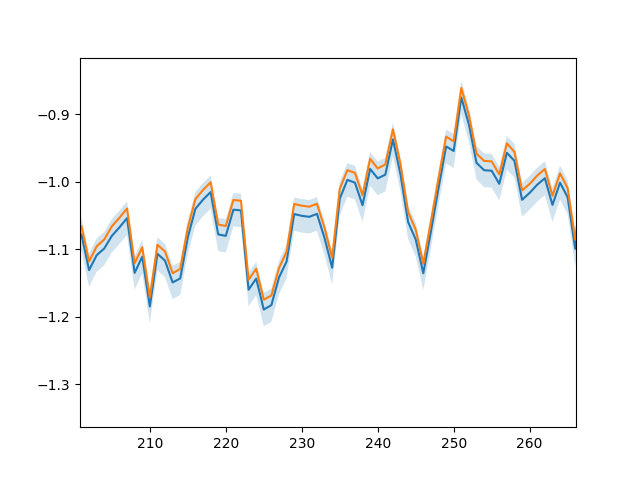

<IPython.core.display.Javascript object>


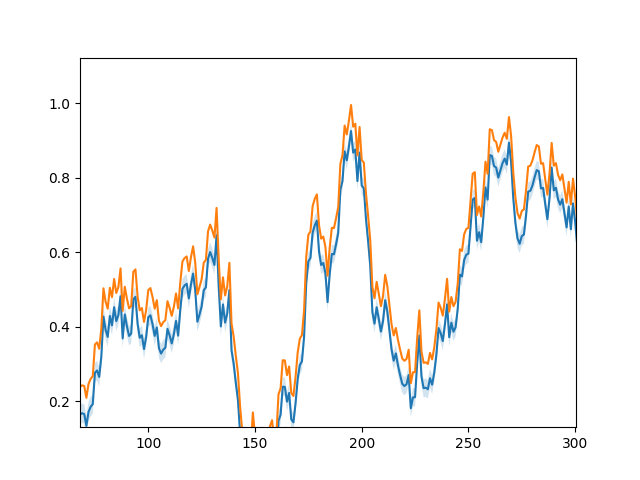

<IPython.core.display.Javascript object>


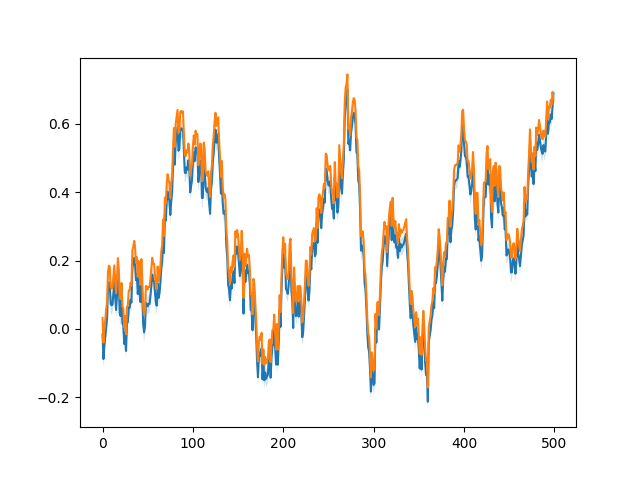

In [3]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
plt.plot(df.index, df['gnd_z'])

plt.show()


<IPython.core.display.Javascript object>


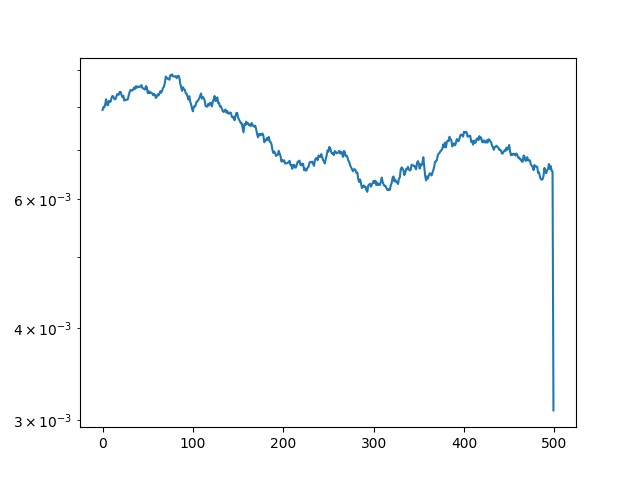

In [4]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)

plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


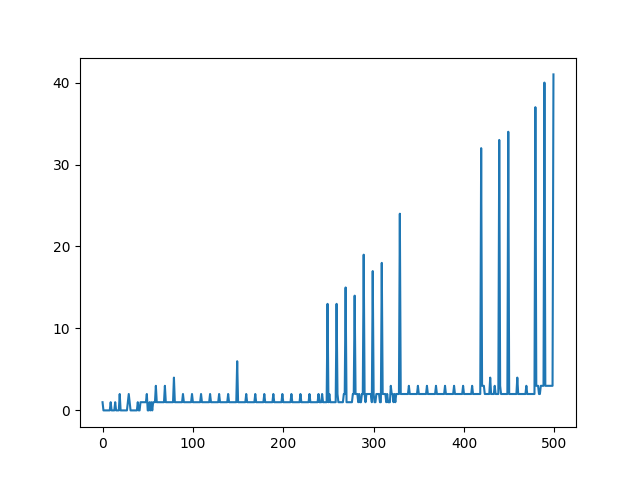

1065 ms


In [5]:
plt.figure()
plt.plot(df.index, df['time'])
print(sum(df['time']), "ms")
plt.show()

In [6]:
anchors = pd.read_csv(prefix+"anchors.csv")
anchors.columns = ['x','y','z']
anchors.head()


,x,y,z
0,-0.487863,-4.347270,2.737160
1,-4.300760,0.133078,2.979340
2,0.134424,-2.106550,1.850130
3,0.802798,8.498710,1.486880
4,4.083850,3.133630,-0.511368


<IPython.core.display.Javascript object>


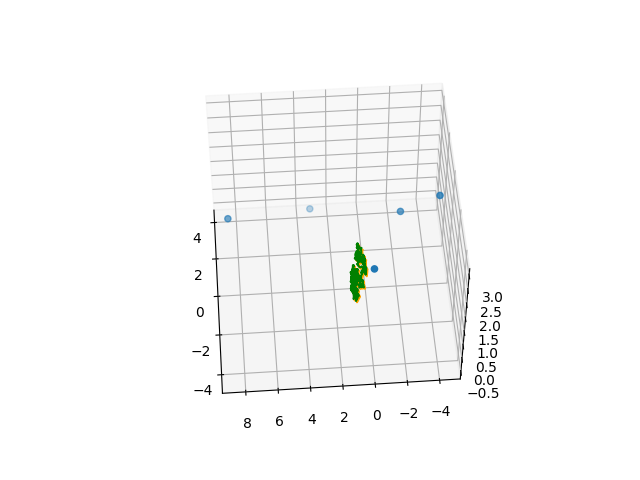

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(anchors['x'], anchors['y'], anchors['z'])
ax.plot(df['x'],df['y'],df['z'], c="orange")
ax.plot(df['gnd_x'],df['gnd_y'],df['gnd_z'], c="green")

